In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from diff_traj.utils.io import read_file
import statistics as stats
import numpy as np
plt.style.use('seaborn-whitegrid')

In [2]:
data = read_file('../results/diff-metrics.pkl')
baseline = read_file('../results/baseline-metrics.pkl')

In [4]:
def get_stats(data):
    mean_violations = []
    std_violations = []
    for checkpt_violations in data['violations'][1:]:
        mean_violations.append(stats.mean(checkpt_violations))
        std_violations.append(stats.stdev(checkpt_violations))

    mean_energys = []
    std_energys = []
    for checkpt_energys in data['energys'][1:]:
        mean_energys.append(stats.mean(checkpt_energys))
        std_energys.append(stats.stdev(checkpt_energys))


    mean_collision_states = []
    std_collision_states = []
    for checkpt_coll_states in data['collision_states'][1:]:
        mean_collision_states.append(stats.mean(checkpt_coll_states))
        std_collision_states.append(stats.stdev(checkpt_coll_states))

    return mean_violations, std_violations, mean_energys, std_energys, mean_collision_states, std_collision_states

In [6]:
checkpoints = [10, 20 ,30 , 40, 50, 60, 70, 80, 90, 100]
mean_violations, std_violations, mean_energys, std_energys, mean_collision_states, std_collision_states = get_stats(data)
base_mean_violations, base_std_violations, base_mean_energys, base_std_energys, base_mean_collision_states, base_std_collision_states = get_stats(baseline)

In [15]:
def plot_data(x, ys, stds, title, ylabel='Metric', labels=['Diffusion Model', 'Fully Connected', 'Trajectory Optimization']):
    fig = plt.figure()
    linestyle = {"linestyle":"--", "linewidth":1, "capsize":2, "fmt": '.'}
    assert len(ys) == len(stds)
    for y, std, label in zip(ys, stds, labels):
        plt.errorbar(x, y, yerr=std, label=label, **linestyle)
    plt.xlabel('Training Steps ($10^3$)')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()

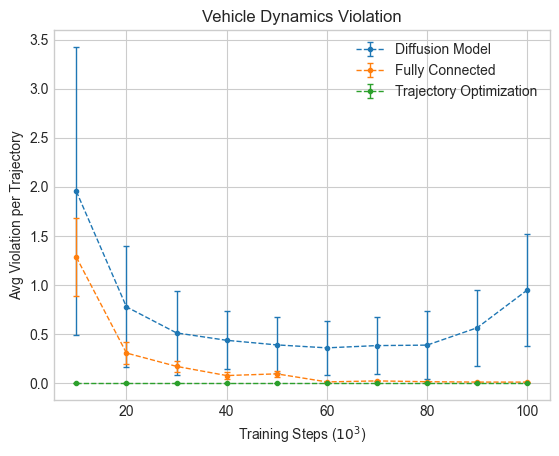

In [16]:
to_violations = [0] * len(mean_violations)
plot_data(checkpoints, (mean_violations, base_mean_violations, to_violations), (std_violations, base_std_violations, to_violations), 'Vehicle Dynamics Violation', ylabel='Avg Violation per Trajectory')

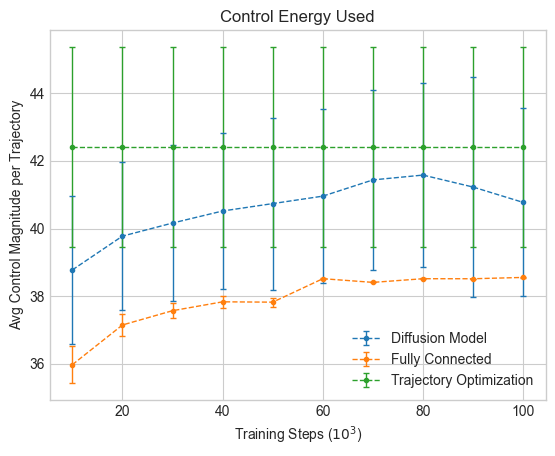

In [17]:
# from eval_baseline.py
# mean: 42.406661
# std: 2.954642 

to_mean_energys = [42.406661] * len(mean_energys)
to_std_energys = [2.954642] * len(std_energys)

plot_data(checkpoints, (mean_energys,  base_mean_energys, to_mean_energys), (std_energys, base_std_energys, to_std_energys), 'Control Energy Used', ylabel='Avg Control Magnitude per Trajectory')

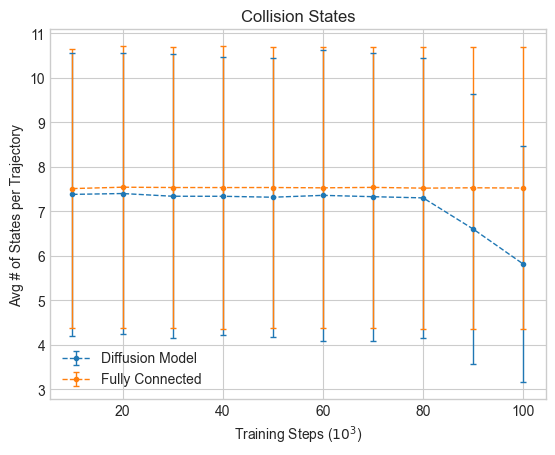

In [13]:
plot_data(checkpoints, mean_collision_states, std_collision_states, base_mean_collision_states, base_std_collision_states, 'Collision States', ylabel="Avg # of States per Trajectory")